In [46]:
%matplotlib inline
import os
import os.path
import cv2
import glob
import pickle
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import numpy as np
from imutils import paths
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.models import load_model

In [47]:
# Define folders names
INPUT_CAPTCHA_FOLDER = "generated_captcha_images"
OUTPUT_FOLDER = "extract_letter"

MODEL_FILENAME_CNN = "captcha_model_CNN.hdf5"
MODEL_FILENAME_MLP = "captcha_model_MLP.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

In [48]:
captcha_files = glob.glob(os.path.join(INPUT_CAPTCHA_FOLDER, "*"))
counts = {}

for (i, captcha_image) in enumerate(captcha_files):
    print("[information]: Processing {}/{}".format(i + 1, len(captcha_files)))

    filename = os.path.basename(captcha_image)
    captcha_text = os.path.splitext(filename)[0]
    image = cv2.imread(captcha_image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Add some extra padding
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours the image
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0] if imutils.is_cv2() else contours[1]

    each_letter_region = []

    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        if w / h > 1.25:
            half_width = int(w / 2)
            each_letter_region.append((x, y, half_width, h))
            each_letter_region.append((x + half_width, y, half_width, h))
        else:
            each_letter_region.append((x, y, w, h))
    if len(each_letter_region) != 4:
        continue

    each_letter_region = sorted(each_letter_region, key=lambda x: x[0])
    for bounding_box, letter_text in zip(each_letter_region, captcha_text):
        # Grab the coordinates of the letter in the image
        x, y, w, h = bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Get the folder to save the image
        save_path = os.path.join(OUTPUT_FOLDER, letter_text)

        # write the letter image to a file
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[letter_text] = count + 1

[information]: Processing 1/9955
[information]: Processing 2/9955
[information]: Processing 3/9955
[information]: Processing 4/9955
[information]: Processing 5/9955
[information]: Processing 6/9955
[information]: Processing 7/9955
[information]: Processing 8/9955
[information]: Processing 9/9955
[information]: Processing 10/9955
[information]: Processing 11/9955
[information]: Processing 12/9955
[information]: Processing 13/9955
[information]: Processing 14/9955
[information]: Processing 15/9955
[information]: Processing 16/9955
[information]: Processing 17/9955
[information]: Processing 18/9955
[information]: Processing 19/9955
[information]: Processing 20/9955
[information]: Processing 21/9955
[information]: Processing 22/9955
[information]: Processing 23/9955
[information]: Processing 24/9955
[information]: Processing 25/9955
[information]: Processing 26/9955
[information]: Processing 27/9955
[information]: Processing 28/9955
[information]: Processing 29/9955
[information]: Processi

[information]: Processing 242/9955
[information]: Processing 243/9955
[information]: Processing 244/9955
[information]: Processing 245/9955
[information]: Processing 246/9955
[information]: Processing 247/9955
[information]: Processing 248/9955
[information]: Processing 249/9955
[information]: Processing 250/9955
[information]: Processing 251/9955
[information]: Processing 252/9955
[information]: Processing 253/9955
[information]: Processing 254/9955
[information]: Processing 255/9955
[information]: Processing 256/9955
[information]: Processing 257/9955
[information]: Processing 258/9955
[information]: Processing 259/9955
[information]: Processing 260/9955
[information]: Processing 261/9955
[information]: Processing 262/9955
[information]: Processing 263/9955
[information]: Processing 264/9955
[information]: Processing 265/9955
[information]: Processing 266/9955
[information]: Processing 267/9955
[information]: Processing 268/9955
[information]: Processing 269/9955
[information]: Proce

[information]: Processing 477/9955
[information]: Processing 478/9955
[information]: Processing 479/9955
[information]: Processing 480/9955
[information]: Processing 481/9955
[information]: Processing 482/9955
[information]: Processing 483/9955
[information]: Processing 484/9955
[information]: Processing 485/9955
[information]: Processing 486/9955
[information]: Processing 487/9955
[information]: Processing 488/9955
[information]: Processing 489/9955
[information]: Processing 490/9955
[information]: Processing 491/9955
[information]: Processing 492/9955
[information]: Processing 493/9955
[information]: Processing 494/9955
[information]: Processing 495/9955
[information]: Processing 496/9955
[information]: Processing 497/9955
[information]: Processing 498/9955
[information]: Processing 499/9955
[information]: Processing 500/9955
[information]: Processing 501/9955
[information]: Processing 502/9955
[information]: Processing 503/9955
[information]: Processing 504/9955
[information]: Proce

[information]: Processing 712/9955
[information]: Processing 713/9955
[information]: Processing 714/9955
[information]: Processing 715/9955
[information]: Processing 716/9955
[information]: Processing 717/9955
[information]: Processing 718/9955
[information]: Processing 719/9955
[information]: Processing 720/9955
[information]: Processing 721/9955
[information]: Processing 722/9955
[information]: Processing 723/9955
[information]: Processing 724/9955
[information]: Processing 725/9955
[information]: Processing 726/9955
[information]: Processing 727/9955
[information]: Processing 728/9955
[information]: Processing 729/9955
[information]: Processing 730/9955
[information]: Processing 731/9955
[information]: Processing 732/9955
[information]: Processing 733/9955
[information]: Processing 734/9955
[information]: Processing 735/9955
[information]: Processing 736/9955
[information]: Processing 737/9955
[information]: Processing 738/9955
[information]: Processing 739/9955
[information]: Proce

[information]: Processing 958/9955
[information]: Processing 959/9955
[information]: Processing 960/9955
[information]: Processing 961/9955
[information]: Processing 962/9955
[information]: Processing 963/9955
[information]: Processing 964/9955
[information]: Processing 965/9955
[information]: Processing 966/9955
[information]: Processing 967/9955
[information]: Processing 968/9955
[information]: Processing 969/9955
[information]: Processing 970/9955
[information]: Processing 971/9955
[information]: Processing 972/9955
[information]: Processing 973/9955
[information]: Processing 974/9955
[information]: Processing 975/9955
[information]: Processing 976/9955
[information]: Processing 977/9955
[information]: Processing 978/9955
[information]: Processing 979/9955
[information]: Processing 980/9955
[information]: Processing 981/9955
[information]: Processing 982/9955
[information]: Processing 983/9955
[information]: Processing 984/9955
[information]: Processing 985/9955
[information]: Proce

[information]: Processing 1187/9955
[information]: Processing 1188/9955
[information]: Processing 1189/9955
[information]: Processing 1190/9955
[information]: Processing 1191/9955
[information]: Processing 1192/9955
[information]: Processing 1193/9955
[information]: Processing 1194/9955
[information]: Processing 1195/9955
[information]: Processing 1196/9955
[information]: Processing 1197/9955
[information]: Processing 1198/9955
[information]: Processing 1199/9955
[information]: Processing 1200/9955
[information]: Processing 1201/9955
[information]: Processing 1202/9955
[information]: Processing 1203/9955
[information]: Processing 1204/9955
[information]: Processing 1205/9955
[information]: Processing 1206/9955
[information]: Processing 1207/9955
[information]: Processing 1208/9955
[information]: Processing 1209/9955
[information]: Processing 1210/9955
[information]: Processing 1211/9955
[information]: Processing 1212/9955
[information]: Processing 1213/9955
[information]: Processing 12

[information]: Processing 1417/9955
[information]: Processing 1418/9955
[information]: Processing 1419/9955
[information]: Processing 1420/9955
[information]: Processing 1421/9955
[information]: Processing 1422/9955
[information]: Processing 1423/9955
[information]: Processing 1424/9955
[information]: Processing 1425/9955
[information]: Processing 1426/9955
[information]: Processing 1427/9955
[information]: Processing 1428/9955
[information]: Processing 1429/9955
[information]: Processing 1430/9955
[information]: Processing 1431/9955
[information]: Processing 1432/9955
[information]: Processing 1433/9955
[information]: Processing 1434/9955
[information]: Processing 1435/9955
[information]: Processing 1436/9955
[information]: Processing 1437/9955
[information]: Processing 1438/9955
[information]: Processing 1439/9955
[information]: Processing 1440/9955
[information]: Processing 1441/9955
[information]: Processing 1442/9955
[information]: Processing 1443/9955
[information]: Processing 14

[information]: Processing 1646/9955
[information]: Processing 1647/9955
[information]: Processing 1648/9955
[information]: Processing 1649/9955
[information]: Processing 1650/9955
[information]: Processing 1651/9955
[information]: Processing 1652/9955
[information]: Processing 1653/9955
[information]: Processing 1654/9955
[information]: Processing 1655/9955
[information]: Processing 1656/9955
[information]: Processing 1657/9955
[information]: Processing 1658/9955
[information]: Processing 1659/9955
[information]: Processing 1660/9955
[information]: Processing 1661/9955
[information]: Processing 1662/9955
[information]: Processing 1663/9955
[information]: Processing 1664/9955
[information]: Processing 1665/9955
[information]: Processing 1666/9955
[information]: Processing 1667/9955
[information]: Processing 1668/9955
[information]: Processing 1669/9955
[information]: Processing 1670/9955
[information]: Processing 1671/9955
[information]: Processing 1672/9955
[information]: Processing 16

[information]: Processing 1890/9955
[information]: Processing 1891/9955
[information]: Processing 1892/9955
[information]: Processing 1893/9955
[information]: Processing 1894/9955
[information]: Processing 1895/9955
[information]: Processing 1896/9955
[information]: Processing 1897/9955
[information]: Processing 1898/9955
[information]: Processing 1899/9955
[information]: Processing 1900/9955
[information]: Processing 1901/9955
[information]: Processing 1902/9955
[information]: Processing 1903/9955
[information]: Processing 1904/9955
[information]: Processing 1905/9955
[information]: Processing 1906/9955
[information]: Processing 1907/9955
[information]: Processing 1908/9955
[information]: Processing 1909/9955
[information]: Processing 1910/9955
[information]: Processing 1911/9955
[information]: Processing 1912/9955
[information]: Processing 1913/9955
[information]: Processing 1914/9955
[information]: Processing 1915/9955
[information]: Processing 1916/9955
[information]: Processing 19

[information]: Processing 2117/9955
[information]: Processing 2118/9955
[information]: Processing 2119/9955
[information]: Processing 2120/9955
[information]: Processing 2121/9955
[information]: Processing 2122/9955
[information]: Processing 2123/9955
[information]: Processing 2124/9955
[information]: Processing 2125/9955
[information]: Processing 2126/9955
[information]: Processing 2127/9955
[information]: Processing 2128/9955
[information]: Processing 2129/9955
[information]: Processing 2130/9955
[information]: Processing 2131/9955
[information]: Processing 2132/9955
[information]: Processing 2133/9955
[information]: Processing 2134/9955
[information]: Processing 2135/9955
[information]: Processing 2136/9955
[information]: Processing 2137/9955
[information]: Processing 2138/9955
[information]: Processing 2139/9955
[information]: Processing 2140/9955
[information]: Processing 2141/9955
[information]: Processing 2142/9955
[information]: Processing 2143/9955
[information]: Processing 21

[information]: Processing 2351/9955
[information]: Processing 2352/9955
[information]: Processing 2353/9955
[information]: Processing 2354/9955
[information]: Processing 2355/9955
[information]: Processing 2356/9955
[information]: Processing 2357/9955
[information]: Processing 2358/9955
[information]: Processing 2359/9955
[information]: Processing 2360/9955
[information]: Processing 2361/9955
[information]: Processing 2362/9955
[information]: Processing 2363/9955
[information]: Processing 2364/9955
[information]: Processing 2365/9955
[information]: Processing 2366/9955
[information]: Processing 2367/9955
[information]: Processing 2368/9955
[information]: Processing 2369/9955
[information]: Processing 2370/9955
[information]: Processing 2371/9955
[information]: Processing 2372/9955
[information]: Processing 2373/9955
[information]: Processing 2374/9955
[information]: Processing 2375/9955
[information]: Processing 2376/9955
[information]: Processing 2377/9955
[information]: Processing 23

[information]: Processing 2583/9955
[information]: Processing 2584/9955
[information]: Processing 2585/9955
[information]: Processing 2586/9955
[information]: Processing 2587/9955
[information]: Processing 2588/9955
[information]: Processing 2589/9955
[information]: Processing 2590/9955
[information]: Processing 2591/9955
[information]: Processing 2592/9955
[information]: Processing 2593/9955
[information]: Processing 2594/9955
[information]: Processing 2595/9955
[information]: Processing 2596/9955
[information]: Processing 2597/9955
[information]: Processing 2598/9955
[information]: Processing 2599/9955
[information]: Processing 2600/9955
[information]: Processing 2601/9955
[information]: Processing 2602/9955
[information]: Processing 2603/9955
[information]: Processing 2604/9955
[information]: Processing 2605/9955
[information]: Processing 2606/9955
[information]: Processing 2607/9955
[information]: Processing 2608/9955
[information]: Processing 2609/9955
[information]: Processing 26

[information]: Processing 2819/9955
[information]: Processing 2820/9955
[information]: Processing 2821/9955
[information]: Processing 2822/9955
[information]: Processing 2823/9955
[information]: Processing 2824/9955
[information]: Processing 2825/9955
[information]: Processing 2826/9955
[information]: Processing 2827/9955
[information]: Processing 2828/9955
[information]: Processing 2829/9955
[information]: Processing 2830/9955
[information]: Processing 2831/9955
[information]: Processing 2832/9955
[information]: Processing 2833/9955
[information]: Processing 2834/9955
[information]: Processing 2835/9955
[information]: Processing 2836/9955
[information]: Processing 2837/9955
[information]: Processing 2838/9955
[information]: Processing 2839/9955
[information]: Processing 2840/9955
[information]: Processing 2841/9955
[information]: Processing 2842/9955
[information]: Processing 2843/9955
[information]: Processing 2844/9955
[information]: Processing 2845/9955
[information]: Processing 28

[information]: Processing 3051/9955
[information]: Processing 3052/9955
[information]: Processing 3053/9955
[information]: Processing 3054/9955
[information]: Processing 3055/9955
[information]: Processing 3056/9955
[information]: Processing 3057/9955
[information]: Processing 3058/9955
[information]: Processing 3059/9955
[information]: Processing 3060/9955
[information]: Processing 3061/9955
[information]: Processing 3062/9955
[information]: Processing 3063/9955
[information]: Processing 3064/9955
[information]: Processing 3065/9955
[information]: Processing 3066/9955
[information]: Processing 3067/9955
[information]: Processing 3068/9955
[information]: Processing 3069/9955
[information]: Processing 3070/9955
[information]: Processing 3071/9955
[information]: Processing 3072/9955
[information]: Processing 3073/9955
[information]: Processing 3074/9955
[information]: Processing 3075/9955
[information]: Processing 3076/9955
[information]: Processing 3077/9955
[information]: Processing 30

[information]: Processing 3294/9955
[information]: Processing 3295/9955
[information]: Processing 3296/9955
[information]: Processing 3297/9955
[information]: Processing 3298/9955
[information]: Processing 3299/9955
[information]: Processing 3300/9955
[information]: Processing 3301/9955
[information]: Processing 3302/9955
[information]: Processing 3303/9955
[information]: Processing 3304/9955
[information]: Processing 3305/9955
[information]: Processing 3306/9955
[information]: Processing 3307/9955
[information]: Processing 3308/9955
[information]: Processing 3309/9955
[information]: Processing 3310/9955
[information]: Processing 3311/9955
[information]: Processing 3312/9955
[information]: Processing 3313/9955
[information]: Processing 3314/9955
[information]: Processing 3315/9955
[information]: Processing 3316/9955
[information]: Processing 3317/9955
[information]: Processing 3318/9955
[information]: Processing 3319/9955
[information]: Processing 3320/9955
[information]: Processing 33

[information]: Processing 3531/9955
[information]: Processing 3532/9955
[information]: Processing 3533/9955
[information]: Processing 3534/9955
[information]: Processing 3535/9955
[information]: Processing 3536/9955
[information]: Processing 3537/9955
[information]: Processing 3538/9955
[information]: Processing 3539/9955
[information]: Processing 3540/9955
[information]: Processing 3541/9955
[information]: Processing 3542/9955
[information]: Processing 3543/9955
[information]: Processing 3544/9955
[information]: Processing 3545/9955
[information]: Processing 3546/9955
[information]: Processing 3547/9955
[information]: Processing 3548/9955
[information]: Processing 3549/9955
[information]: Processing 3550/9955
[information]: Processing 3551/9955
[information]: Processing 3552/9955
[information]: Processing 3553/9955
[information]: Processing 3554/9955
[information]: Processing 3555/9955
[information]: Processing 3556/9955
[information]: Processing 3557/9955
[information]: Processing 35

[information]: Processing 3768/9955
[information]: Processing 3769/9955
[information]: Processing 3770/9955
[information]: Processing 3771/9955
[information]: Processing 3772/9955
[information]: Processing 3773/9955
[information]: Processing 3774/9955
[information]: Processing 3775/9955
[information]: Processing 3776/9955
[information]: Processing 3777/9955
[information]: Processing 3778/9955
[information]: Processing 3779/9955
[information]: Processing 3780/9955
[information]: Processing 3781/9955
[information]: Processing 3782/9955
[information]: Processing 3783/9955
[information]: Processing 3784/9955
[information]: Processing 3785/9955
[information]: Processing 3786/9955
[information]: Processing 3787/9955
[information]: Processing 3788/9955
[information]: Processing 3789/9955
[information]: Processing 3790/9955
[information]: Processing 3791/9955
[information]: Processing 3792/9955
[information]: Processing 3793/9955
[information]: Processing 3794/9955
[information]: Processing 37

[information]: Processing 3996/9955
[information]: Processing 3997/9955
[information]: Processing 3998/9955
[information]: Processing 3999/9955
[information]: Processing 4000/9955
[information]: Processing 4001/9955
[information]: Processing 4002/9955
[information]: Processing 4003/9955
[information]: Processing 4004/9955
[information]: Processing 4005/9955
[information]: Processing 4006/9955
[information]: Processing 4007/9955
[information]: Processing 4008/9955
[information]: Processing 4009/9955
[information]: Processing 4010/9955
[information]: Processing 4011/9955
[information]: Processing 4012/9955
[information]: Processing 4013/9955
[information]: Processing 4014/9955
[information]: Processing 4015/9955
[information]: Processing 4016/9955
[information]: Processing 4017/9955
[information]: Processing 4018/9955
[information]: Processing 4019/9955
[information]: Processing 4020/9955
[information]: Processing 4021/9955
[information]: Processing 4022/9955
[information]: Processing 40

[information]: Processing 4234/9955
[information]: Processing 4235/9955
[information]: Processing 4236/9955
[information]: Processing 4237/9955
[information]: Processing 4238/9955
[information]: Processing 4239/9955
[information]: Processing 4240/9955
[information]: Processing 4241/9955
[information]: Processing 4242/9955
[information]: Processing 4243/9955
[information]: Processing 4244/9955
[information]: Processing 4245/9955
[information]: Processing 4246/9955
[information]: Processing 4247/9955
[information]: Processing 4248/9955
[information]: Processing 4249/9955
[information]: Processing 4250/9955
[information]: Processing 4251/9955
[information]: Processing 4252/9955
[information]: Processing 4253/9955
[information]: Processing 4254/9955
[information]: Processing 4255/9955
[information]: Processing 4256/9955
[information]: Processing 4257/9955
[information]: Processing 4258/9955
[information]: Processing 4259/9955
[information]: Processing 4260/9955
[information]: Processing 42

[information]: Processing 4471/9955
[information]: Processing 4472/9955
[information]: Processing 4473/9955
[information]: Processing 4474/9955
[information]: Processing 4475/9955
[information]: Processing 4476/9955
[information]: Processing 4477/9955
[information]: Processing 4478/9955
[information]: Processing 4479/9955
[information]: Processing 4480/9955
[information]: Processing 4481/9955
[information]: Processing 4482/9955
[information]: Processing 4483/9955
[information]: Processing 4484/9955
[information]: Processing 4485/9955
[information]: Processing 4486/9955
[information]: Processing 4487/9955
[information]: Processing 4488/9955
[information]: Processing 4489/9955
[information]: Processing 4490/9955
[information]: Processing 4491/9955
[information]: Processing 4492/9955
[information]: Processing 4493/9955
[information]: Processing 4494/9955
[information]: Processing 4495/9955
[information]: Processing 4496/9955
[information]: Processing 4497/9955
[information]: Processing 44

[information]: Processing 4714/9955
[information]: Processing 4715/9955
[information]: Processing 4716/9955
[information]: Processing 4717/9955
[information]: Processing 4718/9955
[information]: Processing 4719/9955
[information]: Processing 4720/9955
[information]: Processing 4721/9955
[information]: Processing 4722/9955
[information]: Processing 4723/9955
[information]: Processing 4724/9955
[information]: Processing 4725/9955
[information]: Processing 4726/9955
[information]: Processing 4727/9955
[information]: Processing 4728/9955
[information]: Processing 4729/9955
[information]: Processing 4730/9955
[information]: Processing 4731/9955
[information]: Processing 4732/9955
[information]: Processing 4733/9955
[information]: Processing 4734/9955
[information]: Processing 4735/9955
[information]: Processing 4736/9955
[information]: Processing 4737/9955
[information]: Processing 4738/9955
[information]: Processing 4739/9955
[information]: Processing 4740/9955
[information]: Processing 47

[information]: Processing 4951/9955
[information]: Processing 4952/9955
[information]: Processing 4953/9955
[information]: Processing 4954/9955
[information]: Processing 4955/9955
[information]: Processing 4956/9955
[information]: Processing 4957/9955
[information]: Processing 4958/9955
[information]: Processing 4959/9955
[information]: Processing 4960/9955
[information]: Processing 4961/9955
[information]: Processing 4962/9955
[information]: Processing 4963/9955
[information]: Processing 4964/9955
[information]: Processing 4965/9955
[information]: Processing 4966/9955
[information]: Processing 4967/9955
[information]: Processing 4968/9955
[information]: Processing 4969/9955
[information]: Processing 4970/9955
[information]: Processing 4971/9955
[information]: Processing 4972/9955
[information]: Processing 4973/9955
[information]: Processing 4974/9955
[information]: Processing 4975/9955
[information]: Processing 4976/9955
[information]: Processing 4977/9955
[information]: Processing 49

[information]: Processing 5184/9955
[information]: Processing 5185/9955
[information]: Processing 5186/9955
[information]: Processing 5187/9955
[information]: Processing 5188/9955
[information]: Processing 5189/9955
[information]: Processing 5190/9955
[information]: Processing 5191/9955
[information]: Processing 5192/9955
[information]: Processing 5193/9955
[information]: Processing 5194/9955
[information]: Processing 5195/9955
[information]: Processing 5196/9955
[information]: Processing 5197/9955
[information]: Processing 5198/9955
[information]: Processing 5199/9955
[information]: Processing 5200/9955
[information]: Processing 5201/9955
[information]: Processing 5202/9955
[information]: Processing 5203/9955
[information]: Processing 5204/9955
[information]: Processing 5205/9955
[information]: Processing 5206/9955
[information]: Processing 5207/9955
[information]: Processing 5208/9955
[information]: Processing 5209/9955
[information]: Processing 5210/9955
[information]: Processing 52

[information]: Processing 5423/9955
[information]: Processing 5424/9955
[information]: Processing 5425/9955
[information]: Processing 5426/9955
[information]: Processing 5427/9955
[information]: Processing 5428/9955
[information]: Processing 5429/9955
[information]: Processing 5430/9955
[information]: Processing 5431/9955
[information]: Processing 5432/9955
[information]: Processing 5433/9955
[information]: Processing 5434/9955
[information]: Processing 5435/9955
[information]: Processing 5436/9955
[information]: Processing 5437/9955
[information]: Processing 5438/9955
[information]: Processing 5439/9955
[information]: Processing 5440/9955
[information]: Processing 5441/9955
[information]: Processing 5442/9955
[information]: Processing 5443/9955
[information]: Processing 5444/9955
[information]: Processing 5445/9955
[information]: Processing 5446/9955
[information]: Processing 5447/9955
[information]: Processing 5448/9955
[information]: Processing 5449/9955
[information]: Processing 54

[information]: Processing 5662/9955
[information]: Processing 5663/9955
[information]: Processing 5664/9955
[information]: Processing 5665/9955
[information]: Processing 5666/9955
[information]: Processing 5667/9955
[information]: Processing 5668/9955
[information]: Processing 5669/9955
[information]: Processing 5670/9955
[information]: Processing 5671/9955
[information]: Processing 5672/9955
[information]: Processing 5673/9955
[information]: Processing 5674/9955
[information]: Processing 5675/9955
[information]: Processing 5676/9955
[information]: Processing 5677/9955
[information]: Processing 5678/9955
[information]: Processing 5679/9955
[information]: Processing 5680/9955
[information]: Processing 5681/9955
[information]: Processing 5682/9955
[information]: Processing 5683/9955
[information]: Processing 5684/9955
[information]: Processing 5685/9955
[information]: Processing 5686/9955
[information]: Processing 5687/9955
[information]: Processing 5688/9955
[information]: Processing 56

[information]: Processing 5902/9955
[information]: Processing 5903/9955
[information]: Processing 5904/9955
[information]: Processing 5905/9955
[information]: Processing 5906/9955
[information]: Processing 5907/9955
[information]: Processing 5908/9955
[information]: Processing 5909/9955
[information]: Processing 5910/9955
[information]: Processing 5911/9955
[information]: Processing 5912/9955
[information]: Processing 5913/9955
[information]: Processing 5914/9955
[information]: Processing 5915/9955
[information]: Processing 5916/9955
[information]: Processing 5917/9955
[information]: Processing 5918/9955
[information]: Processing 5919/9955
[information]: Processing 5920/9955
[information]: Processing 5921/9955
[information]: Processing 5922/9955
[information]: Processing 5923/9955
[information]: Processing 5924/9955
[information]: Processing 5925/9955
[information]: Processing 5926/9955
[information]: Processing 5927/9955
[information]: Processing 5928/9955
[information]: Processing 59

[information]: Processing 6140/9955
[information]: Processing 6141/9955
[information]: Processing 6142/9955
[information]: Processing 6143/9955
[information]: Processing 6144/9955
[information]: Processing 6145/9955
[information]: Processing 6146/9955
[information]: Processing 6147/9955
[information]: Processing 6148/9955
[information]: Processing 6149/9955
[information]: Processing 6150/9955
[information]: Processing 6151/9955
[information]: Processing 6152/9955
[information]: Processing 6153/9955
[information]: Processing 6154/9955
[information]: Processing 6155/9955
[information]: Processing 6156/9955
[information]: Processing 6157/9955
[information]: Processing 6158/9955
[information]: Processing 6159/9955
[information]: Processing 6160/9955
[information]: Processing 6161/9955
[information]: Processing 6162/9955
[information]: Processing 6163/9955
[information]: Processing 6164/9955
[information]: Processing 6165/9955
[information]: Processing 6166/9955
[information]: Processing 61

[information]: Processing 6376/9955
[information]: Processing 6377/9955
[information]: Processing 6378/9955
[information]: Processing 6379/9955
[information]: Processing 6380/9955
[information]: Processing 6381/9955
[information]: Processing 6382/9955
[information]: Processing 6383/9955
[information]: Processing 6384/9955
[information]: Processing 6385/9955
[information]: Processing 6386/9955
[information]: Processing 6387/9955
[information]: Processing 6388/9955
[information]: Processing 6389/9955
[information]: Processing 6390/9955
[information]: Processing 6391/9955
[information]: Processing 6392/9955
[information]: Processing 6393/9955
[information]: Processing 6394/9955
[information]: Processing 6395/9955
[information]: Processing 6396/9955
[information]: Processing 6397/9955
[information]: Processing 6398/9955
[information]: Processing 6399/9955
[information]: Processing 6400/9955
[information]: Processing 6401/9955
[information]: Processing 6402/9955
[information]: Processing 64

[information]: Processing 6618/9955
[information]: Processing 6619/9955
[information]: Processing 6620/9955
[information]: Processing 6621/9955
[information]: Processing 6622/9955
[information]: Processing 6623/9955
[information]: Processing 6624/9955
[information]: Processing 6625/9955
[information]: Processing 6626/9955
[information]: Processing 6627/9955
[information]: Processing 6628/9955
[information]: Processing 6629/9955
[information]: Processing 6630/9955
[information]: Processing 6631/9955
[information]: Processing 6632/9955
[information]: Processing 6633/9955
[information]: Processing 6634/9955
[information]: Processing 6635/9955
[information]: Processing 6636/9955
[information]: Processing 6637/9955
[information]: Processing 6638/9955
[information]: Processing 6639/9955
[information]: Processing 6640/9955
[information]: Processing 6641/9955
[information]: Processing 6642/9955
[information]: Processing 6643/9955
[information]: Processing 6644/9955
[information]: Processing 66

[information]: Processing 6847/9955
[information]: Processing 6848/9955
[information]: Processing 6849/9955
[information]: Processing 6850/9955
[information]: Processing 6851/9955
[information]: Processing 6852/9955
[information]: Processing 6853/9955
[information]: Processing 6854/9955
[information]: Processing 6855/9955
[information]: Processing 6856/9955
[information]: Processing 6857/9955
[information]: Processing 6858/9955
[information]: Processing 6859/9955
[information]: Processing 6860/9955
[information]: Processing 6861/9955
[information]: Processing 6862/9955
[information]: Processing 6863/9955
[information]: Processing 6864/9955
[information]: Processing 6865/9955
[information]: Processing 6866/9955
[information]: Processing 6867/9955
[information]: Processing 6868/9955
[information]: Processing 6869/9955
[information]: Processing 6870/9955
[information]: Processing 6871/9955
[information]: Processing 6872/9955
[information]: Processing 6873/9955
[information]: Processing 68

[information]: Processing 7076/9955
[information]: Processing 7077/9955
[information]: Processing 7078/9955
[information]: Processing 7079/9955
[information]: Processing 7080/9955
[information]: Processing 7081/9955
[information]: Processing 7082/9955
[information]: Processing 7083/9955
[information]: Processing 7084/9955
[information]: Processing 7085/9955
[information]: Processing 7086/9955
[information]: Processing 7087/9955
[information]: Processing 7088/9955
[information]: Processing 7089/9955
[information]: Processing 7090/9955
[information]: Processing 7091/9955
[information]: Processing 7092/9955
[information]: Processing 7093/9955
[information]: Processing 7094/9955
[information]: Processing 7095/9955
[information]: Processing 7096/9955
[information]: Processing 7097/9955
[information]: Processing 7098/9955
[information]: Processing 7099/9955
[information]: Processing 7100/9955
[information]: Processing 7101/9955
[information]: Processing 7102/9955
[information]: Processing 71

[information]: Processing 7306/9955
[information]: Processing 7307/9955
[information]: Processing 7308/9955
[information]: Processing 7309/9955
[information]: Processing 7310/9955
[information]: Processing 7311/9955
[information]: Processing 7312/9955
[information]: Processing 7313/9955
[information]: Processing 7314/9955
[information]: Processing 7315/9955
[information]: Processing 7316/9955
[information]: Processing 7317/9955
[information]: Processing 7318/9955
[information]: Processing 7319/9955
[information]: Processing 7320/9955
[information]: Processing 7321/9955
[information]: Processing 7322/9955
[information]: Processing 7323/9955
[information]: Processing 7324/9955
[information]: Processing 7325/9955
[information]: Processing 7326/9955
[information]: Processing 7327/9955
[information]: Processing 7328/9955
[information]: Processing 7329/9955
[information]: Processing 7330/9955
[information]: Processing 7331/9955
[information]: Processing 7332/9955
[information]: Processing 73

[information]: Processing 7537/9955
[information]: Processing 7538/9955
[information]: Processing 7539/9955
[information]: Processing 7540/9955
[information]: Processing 7541/9955
[information]: Processing 7542/9955
[information]: Processing 7543/9955
[information]: Processing 7544/9955
[information]: Processing 7545/9955
[information]: Processing 7546/9955
[information]: Processing 7547/9955
[information]: Processing 7548/9955
[information]: Processing 7549/9955
[information]: Processing 7550/9955
[information]: Processing 7551/9955
[information]: Processing 7552/9955
[information]: Processing 7553/9955
[information]: Processing 7554/9955
[information]: Processing 7555/9955
[information]: Processing 7556/9955
[information]: Processing 7557/9955
[information]: Processing 7558/9955
[information]: Processing 7559/9955
[information]: Processing 7560/9955
[information]: Processing 7561/9955
[information]: Processing 7562/9955
[information]: Processing 7563/9955
[information]: Processing 75

[information]: Processing 7780/9955
[information]: Processing 7781/9955
[information]: Processing 7782/9955
[information]: Processing 7783/9955
[information]: Processing 7784/9955
[information]: Processing 7785/9955
[information]: Processing 7786/9955
[information]: Processing 7787/9955
[information]: Processing 7788/9955
[information]: Processing 7789/9955
[information]: Processing 7790/9955
[information]: Processing 7791/9955
[information]: Processing 7792/9955
[information]: Processing 7793/9955
[information]: Processing 7794/9955
[information]: Processing 7795/9955
[information]: Processing 7796/9955
[information]: Processing 7797/9955
[information]: Processing 7798/9955
[information]: Processing 7799/9955
[information]: Processing 7800/9955
[information]: Processing 7801/9955
[information]: Processing 7802/9955
[information]: Processing 7803/9955
[information]: Processing 7804/9955
[information]: Processing 7805/9955
[information]: Processing 7806/9955
[information]: Processing 78

[information]: Processing 8021/9955
[information]: Processing 8022/9955
[information]: Processing 8023/9955
[information]: Processing 8024/9955
[information]: Processing 8025/9955
[information]: Processing 8026/9955
[information]: Processing 8027/9955
[information]: Processing 8028/9955
[information]: Processing 8029/9955
[information]: Processing 8030/9955
[information]: Processing 8031/9955
[information]: Processing 8032/9955
[information]: Processing 8033/9955
[information]: Processing 8034/9955
[information]: Processing 8035/9955
[information]: Processing 8036/9955
[information]: Processing 8037/9955
[information]: Processing 8038/9955
[information]: Processing 8039/9955
[information]: Processing 8040/9955
[information]: Processing 8041/9955
[information]: Processing 8042/9955
[information]: Processing 8043/9955
[information]: Processing 8044/9955
[information]: Processing 8045/9955
[information]: Processing 8046/9955
[information]: Processing 8047/9955
[information]: Processing 80

[information]: Processing 8261/9955
[information]: Processing 8262/9955
[information]: Processing 8263/9955
[information]: Processing 8264/9955
[information]: Processing 8265/9955
[information]: Processing 8266/9955
[information]: Processing 8267/9955
[information]: Processing 8268/9955
[information]: Processing 8269/9955
[information]: Processing 8270/9955
[information]: Processing 8271/9955
[information]: Processing 8272/9955
[information]: Processing 8273/9955
[information]: Processing 8274/9955
[information]: Processing 8275/9955
[information]: Processing 8276/9955
[information]: Processing 8277/9955
[information]: Processing 8278/9955
[information]: Processing 8279/9955
[information]: Processing 8280/9955
[information]: Processing 8281/9955
[information]: Processing 8282/9955
[information]: Processing 8283/9955
[information]: Processing 8284/9955
[information]: Processing 8285/9955
[information]: Processing 8286/9955
[information]: Processing 8287/9955
[information]: Processing 82

[information]: Processing 8494/9955
[information]: Processing 8495/9955
[information]: Processing 8496/9955
[information]: Processing 8497/9955
[information]: Processing 8498/9955
[information]: Processing 8499/9955
[information]: Processing 8500/9955
[information]: Processing 8501/9955
[information]: Processing 8502/9955
[information]: Processing 8503/9955
[information]: Processing 8504/9955
[information]: Processing 8505/9955
[information]: Processing 8506/9955
[information]: Processing 8507/9955
[information]: Processing 8508/9955
[information]: Processing 8509/9955
[information]: Processing 8510/9955
[information]: Processing 8511/9955
[information]: Processing 8512/9955
[information]: Processing 8513/9955
[information]: Processing 8514/9955
[information]: Processing 8515/9955
[information]: Processing 8516/9955
[information]: Processing 8517/9955
[information]: Processing 8518/9955
[information]: Processing 8519/9955
[information]: Processing 8520/9955
[information]: Processing 85

[information]: Processing 8725/9955
[information]: Processing 8726/9955
[information]: Processing 8727/9955
[information]: Processing 8728/9955
[information]: Processing 8729/9955
[information]: Processing 8730/9955
[information]: Processing 8731/9955
[information]: Processing 8732/9955
[information]: Processing 8733/9955
[information]: Processing 8734/9955
[information]: Processing 8735/9955
[information]: Processing 8736/9955
[information]: Processing 8737/9955
[information]: Processing 8738/9955
[information]: Processing 8739/9955
[information]: Processing 8740/9955
[information]: Processing 8741/9955
[information]: Processing 8742/9955
[information]: Processing 8743/9955
[information]: Processing 8744/9955
[information]: Processing 8745/9955
[information]: Processing 8746/9955
[information]: Processing 8747/9955
[information]: Processing 8748/9955
[information]: Processing 8749/9955
[information]: Processing 8750/9955
[information]: Processing 8751/9955
[information]: Processing 87

[information]: Processing 8960/9955
[information]: Processing 8961/9955
[information]: Processing 8962/9955
[information]: Processing 8963/9955
[information]: Processing 8964/9955
[information]: Processing 8965/9955
[information]: Processing 8966/9955
[information]: Processing 8967/9955
[information]: Processing 8968/9955
[information]: Processing 8969/9955
[information]: Processing 8970/9955
[information]: Processing 8971/9955
[information]: Processing 8972/9955
[information]: Processing 8973/9955
[information]: Processing 8974/9955
[information]: Processing 8975/9955
[information]: Processing 8976/9955
[information]: Processing 8977/9955
[information]: Processing 8978/9955
[information]: Processing 8979/9955
[information]: Processing 8980/9955
[information]: Processing 8981/9955
[information]: Processing 8982/9955
[information]: Processing 8983/9955
[information]: Processing 8984/9955
[information]: Processing 8985/9955
[information]: Processing 8986/9955
[information]: Processing 89

[information]: Processing 9196/9955
[information]: Processing 9197/9955
[information]: Processing 9198/9955
[information]: Processing 9199/9955
[information]: Processing 9200/9955
[information]: Processing 9201/9955
[information]: Processing 9202/9955
[information]: Processing 9203/9955
[information]: Processing 9204/9955
[information]: Processing 9205/9955
[information]: Processing 9206/9955
[information]: Processing 9207/9955
[information]: Processing 9208/9955
[information]: Processing 9209/9955
[information]: Processing 9210/9955
[information]: Processing 9211/9955
[information]: Processing 9212/9955
[information]: Processing 9213/9955
[information]: Processing 9214/9955
[information]: Processing 9215/9955
[information]: Processing 9216/9955
[information]: Processing 9217/9955
[information]: Processing 9218/9955
[information]: Processing 9219/9955
[information]: Processing 9220/9955
[information]: Processing 9221/9955
[information]: Processing 9222/9955
[information]: Processing 92

[information]: Processing 9432/9955
[information]: Processing 9433/9955
[information]: Processing 9434/9955
[information]: Processing 9435/9955
[information]: Processing 9436/9955
[information]: Processing 9437/9955
[information]: Processing 9438/9955
[information]: Processing 9439/9955
[information]: Processing 9440/9955
[information]: Processing 9441/9955
[information]: Processing 9442/9955
[information]: Processing 9443/9955
[information]: Processing 9444/9955
[information]: Processing 9445/9955
[information]: Processing 9446/9955
[information]: Processing 9447/9955
[information]: Processing 9448/9955
[information]: Processing 9449/9955
[information]: Processing 9450/9955
[information]: Processing 9451/9955
[information]: Processing 9452/9955
[information]: Processing 9453/9955
[information]: Processing 9454/9955
[information]: Processing 9455/9955
[information]: Processing 9456/9955
[information]: Processing 9457/9955
[information]: Processing 9458/9955
[information]: Processing 94

[information]: Processing 9664/9955
[information]: Processing 9665/9955
[information]: Processing 9666/9955
[information]: Processing 9667/9955
[information]: Processing 9668/9955
[information]: Processing 9669/9955
[information]: Processing 9670/9955
[information]: Processing 9671/9955
[information]: Processing 9672/9955
[information]: Processing 9673/9955
[information]: Processing 9674/9955
[information]: Processing 9675/9955
[information]: Processing 9676/9955
[information]: Processing 9677/9955
[information]: Processing 9678/9955
[information]: Processing 9679/9955
[information]: Processing 9680/9955
[information]: Processing 9681/9955
[information]: Processing 9682/9955
[information]: Processing 9683/9955
[information]: Processing 9684/9955
[information]: Processing 9685/9955
[information]: Processing 9686/9955
[information]: Processing 9687/9955
[information]: Processing 9688/9955
[information]: Processing 9689/9955
[information]: Processing 9690/9955
[information]: Processing 96

[information]: Processing 9892/9955
[information]: Processing 9893/9955
[information]: Processing 9894/9955
[information]: Processing 9895/9955
[information]: Processing 9896/9955
[information]: Processing 9897/9955
[information]: Processing 9898/9955
[information]: Processing 9899/9955
[information]: Processing 9900/9955
[information]: Processing 9901/9955
[information]: Processing 9902/9955
[information]: Processing 9903/9955
[information]: Processing 9904/9955
[information]: Processing 9905/9955
[information]: Processing 9906/9955
[information]: Processing 9907/9955
[information]: Processing 9908/9955
[information]: Processing 9909/9955
[information]: Processing 9910/9955
[information]: Processing 9911/9955
[information]: Processing 9912/9955
[information]: Processing 9913/9955
[information]: Processing 9914/9955
[information]: Processing 9915/9955
[information]: Processing 9916/9955
[information]: Processing 9917/9955
[information]: Processing 9918/9955
[information]: Processing 99

### Data Visualization

In [49]:
number = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'0':0}
letter = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,
          'L':0,'M':0,'N':0,'O':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'U':0,'V':0,
          'W':0,'X':0,'Y':0,'Z':0}
chlist = ['A','B','C','D','E','F','G','H','I','J','K','L','M',
           'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [50]:
# from the name of files to count how many the letters at each type.
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
%matplotlib inline
captcha_files = glob.glob(os.path.join("generated_captcha_images", "*"))
for (i, captcha_image) in enumerate(captcha_files):
    #print("[information]: Processing {}/{}".format(i + 1, len(captcha_files)))

    filename = os.path.basename(captcha_image)
    captcha_text = os.path.splitext(filename)[0]
    for i in range(4):
        #print (captcha_text[i])
        for num in range(10):
            if captcha_text[i] == str(num):
                number[str(num)] += 1
        for j in range(26):
            if captcha_text[i] == chlist[j]:
                letter[chlist[j]] += 1
#display(number,letter)

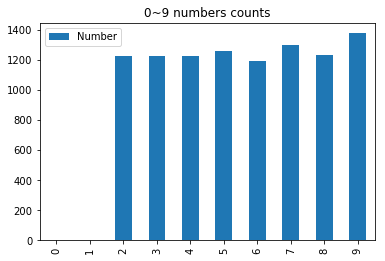

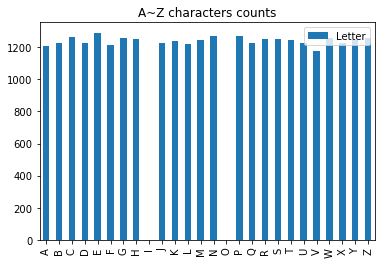

In [51]:

letter_s = pd.Series(letter,name='Letter')
letter_df = pd.DataFrame(letter_s)

number_s = pd.Series(number,name='Number')
number_df = pd.DataFrame(number_s)

number_df.plot(kind='bar',colormap='tab10', title = '0~9 numbers counts')
letter_df.plot(kind='bar',colormap='tab10', title = 'A~Z characters counts')

### Data Preprocessing

In [52]:
# Rsize images to fit 
def resize_image(image, width, height):

    (h, w) = image.shape[:2]
    if w > h:
        image = imutils.resize(image, width=width)
    else:
        image = imutils.resize(image, height=height)

    pad_w = int((width - image.shape[1]) / 2.0)
    pad_h = int((height - image.shape[0]) / 2.0)

    image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))
    return image

In [53]:
each_letter_region = []
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    # print (x,y,w,h)
    # Compare the ratio of width and height 
    if w / h > 1.25:
        # This contour is too wide to be a single letter
        half_w = int(w / 2)
        each_letter_region.append((x, y, half_w, h))
        each_letter_region.append((x + half_w, y, half_w, h))
    else:
        # This is a single letter
        each_letter_region.append((x, y, w, h))
each_letter_regions = sorted(each_letter_region, key=lambda x: x[0])

In [54]:
# initialize the data and labels
data = []
labels = []

# loop over the input images
for file in paths.list_images(OUTPUT_FOLDER):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = resize_image(image, 25, 25)
    image = np.expand_dims(image, axis=2)
    label = file.split(os.path.sep)[-2]
    data.append(image)
    labels.append(label)
# scaling
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)
# Label binary
lbr = LabelBinarizer().fit(y_train)
y_train = lbr.transform(y_train)
y_test = lbr.transform(y_test)


### CNN and MLP

In [77]:
models = []
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lbr, f)

# Build CNN
def CNN_model():
    inpC = Input(shape=(25,25,1))
    conv1 = Conv2D(20, (5, 5), padding="same", activation="relu")(inpC)
    maxpool1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)
    conv2 = Conv2D(50,(5,5),padding="same", activation="relu")(maxpool1)
    maxpool2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)
    flat = Flatten()(maxpool2)
    dense1 = Dense(500, activation="relu")(flat)
    dense2 = Dense(32, activation="softmax")(dense1)
    model = Model(inpC,dense2)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# model.summary()

In [109]:
CNN_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 25, 25, 1)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 25, 25, 20)        520       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 12, 12, 50)        25050     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 6, 6, 50)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1800)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 500)               900500    
__________

In [80]:
from keras.wrappers.scikit_learn import KerasClassifier
# Compile model

# Train the CNN
models = KerasClassifier(CNN_model)
batch_size=[16,32]
epochs=[3,5]
param_grid = dict(epochs=epochs,batch_size=batch_size)
grid_obj = GridSearchCV(models,param_grid=param_grid)
grid_result = grid_obj.fit(X_train,y_train)
# CNN = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=5, verbose=1)
# Save the CNN
# models.append(model.save(MODEL_FILENAME_CNN))

Epoch 1/3
19372/19372 [==============================] - 173s - loss: 0.2392 - acc: 0.9397   
Epoch 2/3
19372/19372 [==============================] - 149s - loss: 0.0175 - acc: 0.9951   - ETA: 2s - loss: 0.0169 - acc: 0.99 - ETA: 1s - loss: 0.016
Epoch 3/3
19372/19372 [==============================] - 159s - loss: 0.2414 - acc: 0.9383   
Epoch 2/3
19372/19372 [==============================] - 159s - loss: 0.0184 - acc: 0.9954   
Epoch 3/3
9686/9686 [==============================] - 28s    
Epoch 1/3
19372/19372 [==============================] - 156s - loss: 0.2258 - acc: 0.9437   
Epoch 2/3
19372/19372 [==============================] - 151s - loss: 0.0215 - acc: 0.9947   
Epoch 3/3
19372/19372 [==============================] - 151s - loss: 0.2549 - acc: 0.9350   
Epoch 2/5
19372/19372 [==============================] - 148s - loss: 0.0207 - acc: 0.9950   
Epoch 3/5
19372/19372 [==============================] - 158s - loss: 0.0111 - acc: 0.9970   
Epoch 4/5
19372/19372 [========

In [106]:
# summary results
best = grid_result.best_params_
#stds = grid_result.cv_results_['std_test_score']
print ('best_params: ', best)
print ('\n',grid_result.grid_scores_[0],'\n',
       grid_result.grid_scores_[1],'\n',
       grid_result.grid_scores_[2],'\n',
       grid_result.grid_scores_[3],
      )
# Save best params of models

best_params:  {'epochs': 3, 'batch_size': 32}

 mean: 0.99604, std: 0.00034, params: {'epochs': 3, 'batch_size': 16} 
 mean: 0.99621, std: 0.00090, params: {'epochs': 5, 'batch_size': 16} 
 mean: 0.99628, std: 0.00008, params: {'epochs': 3, 'batch_size': 32} 
 mean: 0.99484, std: 0.00199, params: {'epochs': 5, 'batch_size': 32}


In [13]:
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lbr, f)
              #Build MLP
inp = Input(shape=(25,25,1))
flat = Flatten()(inp)
Dense1 = Dense(1000, activation='relu')(flat)
Drop1 = Dropout(0.2)(Dense1)
Dense2 = Dense(512, activation='relu')(Drop1)
Drop2 = Dropout(0.2)(Dense2)
Dense3 = Dense(32, activation='softmax')(Drop2)      
model1 = Model(inp,Dense3)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 25, 25, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              626000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                16416     
Total para

In [65]:
# Cmpile MLP
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['mae', 'acc'])
# Train the MLP
MLP = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10, verbose=1)
# Save the MLP
models.append(model1.save(MODEL_FILENAME_MLP))

Train on 29058 samples, validate on 9686 samples
Epoch 1/10
29058/29058 [==============================] - 63s - loss: 0.0623 - mean_absolute_error: 0.0015 - acc: 0.9815 - val_loss: 0.0300 - val_mean_absolute_error: 5.9461e-04 - val_acc: 0.9915
Epoch 2/10
29058/29058 [==============================] - 63s - loss: 0.0533 - mean_absolute_error: 0.0014 - acc: 0.9837 - val_loss: 0.0366 - val_mean_absolute_error: 7.4060e-04 - val_acc: 0.9903
Epoch 3/10
29058/29058 [==============================] - 60s - loss: 0.0603 - mean_absolute_error: 0.0015 - acc: 0.9818 - val_loss: 0.0294 - val_mean_absolute_error: 6.2748e-04 - val_acc: 0.9923
Epoch 4/10
29058/29058 [==============================] - 63s - loss: 0.0501 - mean_absolute_error: 0.0013 - acc: 0.9856 - val_loss: 0.0368 - val_mean_absolute_error: 8.9943e-04 - val_acc: 0.9885
Epoch 5/10
29058/29058 [==============================] - 58s - loss: 0.0406 - mean_absolute_error: 0.0010 - acc: 0.9870 - val_loss: 0.0339 - val_mean_absolute_error: 

In [66]:
print (MLP.history["acc"])
print (CNN.history["acc"])


[0.98151971918232506, 0.98368779682015284, 0.98176061669763925, 0.98558056301190722, 0.9869915341730332, 0.98575263266570312, 0.98540849335811131, 0.9874733292036616, 0.986750636657719, 0.98909078394934269]
[0.94985890288388741, 0.99580150044738114, 0.99814164773900471, 0.99886434028494731, 0.99803840594672721]


In [67]:
display(
MLP.history.items(),
CNN.history.items()
)

dict_items([('mean_absolute_error', [0.0015324615266031647, 0.0013831936916303281, 0.0015437898187572025, 0.0012509087498657741, 0.0010476291213747102, 0.0011440911069587516, 0.001192992741139823, 0.0010037087740392843, 0.001035600532687523, 0.00086680097904877666]), ('val_loss', [0.029984780951286514, 0.036555733982212894, 0.029424629658555145, 0.036750091136589946, 0.033850320682853409, 0.022302521657963016, 0.027908950251140915, 0.030856986735575166, 0.02953180827944802, 0.022993573611691309]), ('val_acc', [0.99153417303324387, 0.99029527152591368, 0.99225686557918646, 0.988540161057196, 0.99132768944868888, 0.99370225067107165, 0.99246334916374146, 0.99246334916374146, 0.99174065661779887, 0.99432170142473675]), ('acc', [0.98151971918232506, 0.98368779682015284, 0.98176061669763925, 0.98558056301190722, 0.9869915341730332, 0.98575263266570312, 0.98540849335811131, 0.9874733292036616, 0.986750636657719, 0.98909078394934269]), ('loss', [0.062270707216189637, 0.053252041692209977, 0.0

dict_items([('val_acc', [0.99463142680156924, 0.99679950443939702, 0.99679950443939702, 0.99803840594672721, 0.99700598802395213]), ('val_loss', [0.023280620480578561, 0.012062928976411095, 0.011037249554004119, 0.0071297766501406375, 0.010375856901594779]), ('acc', [0.94985890288388741, 0.99580150044738114, 0.99814164773900471, 0.99886434028494731, 0.99803840594672721]), ('loss', [0.21185403873562855, 0.016230029650090523, 0.0062253423304494959, 0.0040439116889198897, 0.0073078119224918069])])

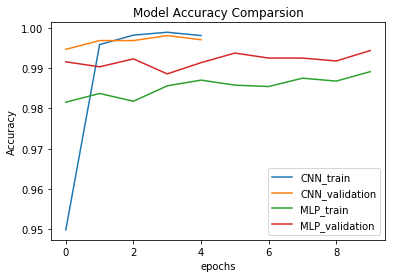

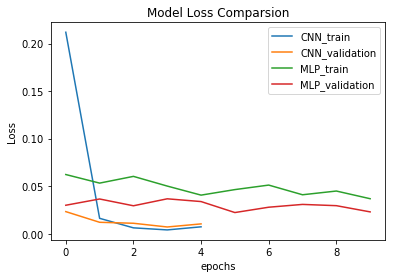

In [68]:
#  "Accuracy"
plt.plot(CNN.history['acc'])
plt.plot(CNN.history['val_acc'])
plt.plot(MLP.history['acc'])
plt.plot(MLP.history['val_acc'])

plt.title('Model Accuracy Comparsion')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['CNN_train', 'CNN_validation',
            'MLP_train', 'MLP_validation'], loc='lower right')
plt.savefig("acc.png",dpi=100)
plt.show()

# "Loss"
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.plot(MLP.history['loss'])
plt.plot(MLP.history['val_loss'])

plt.title('Model Loss Comparsion')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['CNN_train', 'CNN_validation',
            'MLP_train', 'MLP_validation'], loc='upper right')
plt.savefig("loss.png",dpi=100)
plt.show()

In [ ]:
### Use samples to test the model(CNN and MLP)

import pickle
MODEL_LABELS_FILENAME = "model_labels.dat"
CAPTCHA_IMAGE_FOLDER = "test_images"

with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

model_CNN = load_model(MODEL_FILENAME_CNN)
model_MLP = load_model(MODEL_FILENAME_MLP)

captcha_image_files = list(paths.list_images(CAPTCHA_IMAGE_FOLDER))
captcha_image_files = np.random.choice(captcha_image_files, size=(20,), replace=False)

# loop over the image paths
for image_file in captcha_image_files:
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.copyMakeBorder(image, 25, 25, 25, 25, cv2.BORDER_REPLICATE)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if imutils.is_cv2() else contours[1]

    each_letter_region = []

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if w / h > 1.25:          
            half_w = int(w / 2)
            each_letter_region.append((x, y, half_w, h))
            each_letter_region.append((x + half_w, y, half_w, h))
        else:
            each_letter_region.append((x, y, w, h))
    if len(each_letter_region) != 4:
        continue
        
    each_letter_region = sorted(each_letter_region, key=lambda x: x[0])

    output_cnn= cv2.merge([image] * 3)
    output_mlp = cv2.merge([image] * 3)
    preds_cnn = []
    preds_mlp = []

    # loop over the letters
    for letter_box in each_letter_region:
        x, y, w, h = letter_box
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]

        letter_image = resize_image(letter_image, 25, 25)

        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)

        pred_cnn = model_CNN.predict(letter_image)
        pred_mlp = model_MLP.predict(letter_image)

        
        letter_cnn = lbr.inverse_transform(pred_cnn)[0]
        preds_cnn.append(letter_cnn)
        
        letter_mlp = lbr.inverse_transform(pred_mlp)[0]
        preds_mlp.append(letter_mlp)

        
        cv2.rectangle(output_cnn, (x - 5, y - 5), (x + w , y + h), (10, 100, 50), 1)
        cv2.putText(output_cnn, letter_cnn, (x , y - 8), cv2.FONT_HERSHEY_DUPLEX, 0.50, (10, 100, 50), 2)
        
        cv2.rectangle(output_mlp, (x - 5, y - 5), (x + w , y + h), (10, 100, 50), 1)
        cv2.putText(output_mlp, letter_mlp, (x , y - 8), cv2.FONT_HERSHEY_DUPLEX, 0.50, (10, 100, 50), 2)

    
    captcha_text = "".join(preds_cnn)
    captcha_text = "".join(preds_mlp)
    print("CAPTCHA text is: {}".format(captcha_text))

    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', np.hstack([output_cnn,output_mlp]))   
    
    cv2.waitKey()

CAPTCHA text is: UQJG
CAPTCHA text is: E4S5
CAPTCHA text is: UNUS
CAPTCHA text is: 2HS6
CAPTCHA text is: UKSQ
CAPTCHA text is: UNBP
CAPTCHA text is: TY4L
CAPTCHA text is: 2E63
CAPTCHA text is: UR7G
CAPTCHA text is: E4N7
CAPTCHA text is: UMP7
CAPTCHA text is: 2SPF
CAPTCHA text is: U4S4
CAPTCHA text is: U99T
CAPTCHA text is: E4DK
CAPTCHA text is: UEWN
